Outlier and its treatment- Excelerate

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
#1.skewness

df1['total_bill'].skew()

1.1332130376158205

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

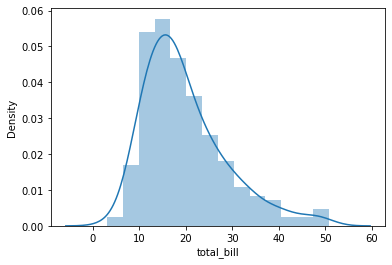

In [11]:
#displot

sns.distplot(df1['total_bill'])

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

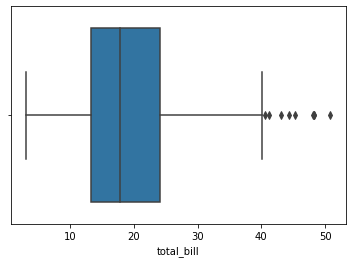

In [12]:
#boxplot

sns.boxplot(df1['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

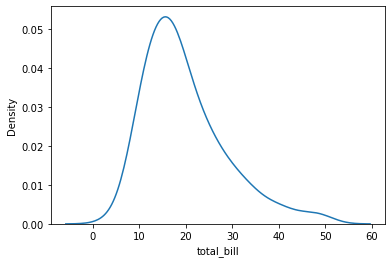

In [13]:
#kdeplot

sns.kdeplot(df1['total_bill'])

Ways to treat outliers:
1. Z-Score
2. IQR

In [14]:
#1. zscore

from scipy.stats import zscore

In [15]:
df1['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [ ]:
#Adding one more row for zscore of total_bill -- ZTB and finding zscore

In [17]:
#zscore
df1['ZTB'] =  zscore(df1['total_bill'])
df1.head(5)

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [18]:
#zscore when in between -3 to 3 of zscore is normal.

In [19]:
df1[df1['ZTB']>3]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [20]:
df1[df1['ZTB']<-3]

,total_bill,tip,sex,smoker,day,time,size,ZTB


In [23]:
#So values must be in between 3 and -3 i.e-- >-3 and <3

df1[(df1['ZTB']>-3) & (df1['ZTB']<3)]


,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


In [24]:
df2 = df1[(df1['ZTB']>-3) & (df1['ZTB']<3)]
df2.head(5)

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [26]:
df1.shape

(244, 8)

In [27]:
df2.shape

(240, 8)

In [28]:
#Now checking skewness after zscore-

#before
df1['total_bill'].skew()

1.1332130376158205

In [29]:
#after zscore 

df2['total_bill'].skew()

0.9148510261489988

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

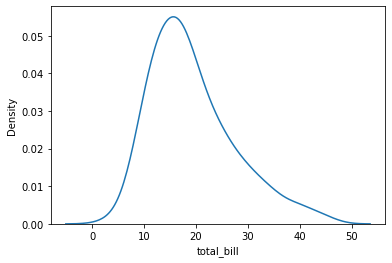

In [31]:
#Graph after zscore

sns.kdeplot(df2['total_bill'])

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

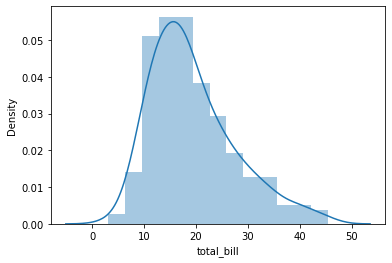

In [33]:
#boxplot after zscore

sns.distplot(df2['total_bill'])

In [ ]:
#Using IQR method to remove outliers

IQR :-

In [35]:
Q1 = df1['total_bill'].quantile(0.25)
Q2 = df1['total_bill'].quantile(0.5)
Q3 = df1['total_bill'].quantile(0.75)

In [36]:
print(Q1,Q2,Q3)

13.3475 17.795 24.127499999999998


Formula for IQR = Q3 -Q1

In [39]:
IQR = Q3 - Q1
print('IQR :' , IQR)

IQR : 10.779999999999998


In [40]:
Upper_limit = Q3 + IQR * 1.5
Lower_limit = Q1 - IQR * 1.5

In [49]:
print('Upper limit is :', Upper_limit,'and',
      'Lower limit is:', Lower_limit)

Upper limit is : 40.29749999999999 and Lower limit is: -2.8224999999999945


In [51]:
# To find any outlier using upperlimit and lower limit

df1[df1['total_bill'] < Lower_limit]

,total_bill,tip,sex,smoker,day,time,size,ZTB


In [53]:
df1[df1['total_bill'] > Upper_limit]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.337202
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.625356
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [54]:
len(df1[df1['total_bill'] > Upper_limit])

# 9 outliers i.e --59 to 212

9

In [55]:
df1[(df1['total_bill'] < Upper_limit) & (df1['total_bill'] > Lower_limit)]

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


In [59]:
df3 = df1[(df1['total_bill'] < Upper_limit) & (df1['total_bill'] > Lower_limit)]
df3.head()

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [57]:
df1.shape

(244, 8)

In [58]:
df3.shape

(235, 8)

In [60]:
df1['total_bill'].skew()

1.1332130376158205

In [61]:
df3['total_bill'].skew()

0.7255976389840281

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

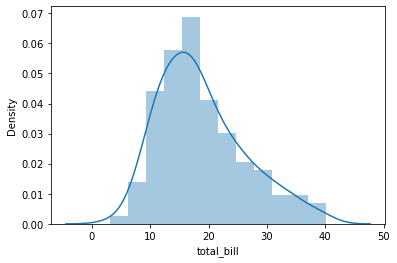

In [62]:
sns.distplot(df3['total_bill'])